In [112]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()  
nodes = range(5)
G.add_nodes_from(nodes)
weights = {
        (0, 1): 5, (0, 2): 3, (0, 3): 2, (0, 4): 6,
        (1, 2): 9, (1, 3): 7, (1, 4): 1,
        (2, 3): 2, (2, 4): 6,
        (3, 4): 8
    }
for (u, v), weight in weights.items():
    G.add_edge(u, v, weight=weight)

In [113]:
def initialize_population(size, graph):
    population = []
    for _ in range(size):
        path = list(graph.nodes())
        np.random.shuffle(path)
        path.append(path[0]) 
        population.append(path)
    return population

def calculate_cost(graph, path):
    return sum(graph[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))

def genetic_algorithm(graph, population_size, generations, mutation_rate):
    population = initialize_population(population_size, graph)
    best_solution = None
    best_cost = float('inf')
    
    for _ in range(generations):
        fitness_scores = [calculate_cost(graph, path) for path in population]
        sorted_population = sorted(zip(fitness_scores, population), key=lambda x: x[0])
        
        if sorted_population[0][0] < best_cost:
            best_cost = sorted_population[0][0]
            best_solution = sorted_population[0][1]
        
        next_generation = [ind[1] for ind in sorted_population[:2]] 
        
        while len(next_generation) < population_size:
            parents = random.sample(next_generation[:5], 2)  
            child1, child2 = crossover(parents[0], parents[1])
            next_generation.extend([mutate(child1, mutation_rate), mutate(child2, mutation_rate)])
        
        population = next_generation
    
    return best_solution, best_cost

def crossover(parent1, parent2):
    cut = random.randint(1, len(parent1) - 2)
    child1 = parent1[:cut] + [node for node in parent2 if node not in parent1[:cut] and node != parent1[0]]
    child2 = parent2[:cut] + [node for node in parent1 if node not in parent2[:cut] and node != parent2[0]]
    child1.append(child1[0])  
    child2.append(child2[0]) 
    return child1, child2

def mutate(path, rate):
    if random.random() < rate:
        idx1, idx2 = random.sample(range(1, len(path) - 1), 2)
        path[idx1], path[idx2] = path[idx2], path[idx1]
    return path

Mejor camino: [3, 0, 1, 4, 2, 3]
Costo del mejor camino: 16


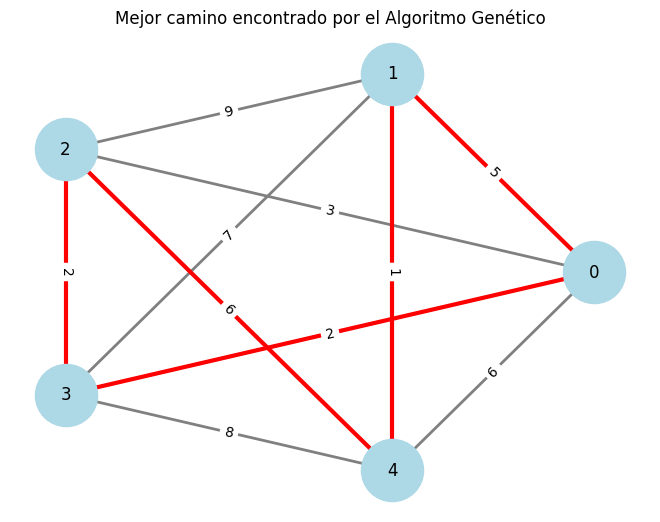

In [114]:
population_size = 10
generations = 100
mutation_rate = 0.1

best_path, best_path_cost = genetic_algorithm(G, population_size, generations, mutation_rate)

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray', width=2)
path_edges = list(zip(best_path[:-1], best_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
print("Mejor camino:", best_path)
print("Costo del mejor camino:", best_path_cost)
plt.title("Mejor camino encontrado por el Algoritmo Genético")
plt.show()
